# Análisis de Resultados - Tablas Resumen por Método

Este notebook presenta las tablas resumen de rendimiento para cada método de clasificación (KNN, SVM, RF, NB) con diferentes conjuntos de datos.

In [13]:
import pandas as pd
import numpy as np
import os
import glob
from IPython.display import display, Markdown

methods = ['KNN', 'SVM', 'RF', 'NB']
norm_types = ['original', 'norm', 'std']
pca_variants = ['', '_PCA80', '_PCA95']

# Función para crear tabla resumen para un método específico
def create_summary_table(method):
    results_by_dataset = {}

    # Iterar sobre todos los tipos de normalización y variantes PCA
    for norm in norm_types:
        for pca in pca_variants:
            dataset_name = f"{norm}{pca}"
            
            # Leer los 5 archivos CSV correspondientes a los 5 folds
            fold_data = []
            for fold in range(1, 6):
                file_pattern = f"cross_validation_evaluation/{method}_{dataset_name}_{fold}.csv"
                if os.path.exists(file_pattern):
                    df = pd.read_csv(file_pattern)
                    # Convertir a diccionario para facilitar el acceso
                    metrics_dict = dict(zip(df['metric'], df['value']))
                    fold_data.append(metrics_dict)
            
            # Calcular media y desviación típica para cada métrica
            all_metrics = fold_data[0].keys()
            dataset_results = {}
                
            for metric in all_metrics:
                values = [fold[metric] for fold in fold_data if metric in fold]
                if values:
                    mean = np.mean(values)
                    std = np.std(values, ddof=1)  # Usar ddof=1 para desviación estándar muestral
                    # Formato LaTeX: media $\pm$ desviación
                    if np.isnan(std) or np.isclose(std, 0):
                        dataset_results[metric] = f"{mean:.4f}"
                    else:
                        dataset_results[metric] = f"{mean:.4f} $\\pm$ {std:.4f}"
                
            results_by_dataset[dataset_name] = dataset_results
    
    # Crear DataFrame con los resultados
    df_summary = pd.DataFrame(results_by_dataset).T

    # Ordenar columnas en un orden lógico
    desired_order = ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Sensibilidad', 
                    'Especificidad', 'Tasa de Falsos Positivos', 'Tasa de Falsos Negativos', 'AUC']

    column_order = [col for col in desired_order if col in df_summary.columns]
    df_summary = df_summary[column_order]
    
    csv_filename = f'cross_validation_results/{method}_summary_table.csv'
    df_summary.to_csv(csv_filename, index=True)
    
    latex_filename = f'cross_validation_results/{method}_summary_table.tex'
    latex_str = df_summary.to_latex(
        index=True,
        escape=False,
        caption=f'Tabla resumen del método {method}',
        label=f'tab:{method}_summary',
        column_format='l' + 'c' * len(df_summary.columns)
    )
    
    with open(latex_filename, 'w', encoding='utf-8') as f:
        f.write(latex_str)
    
    return df_summary

## Tabla Resumen - KNN

A continuación se presenta la tabla resumen del método **K-Nearest Neighbors (KNN)** con todos los conjuntos de datos considerados. Cada celda muestra el formato "media $\pm$ desviación típica" para cada métrica.

In [14]:
knn_table = create_summary_table('KNN')

display(knn_table)

,Exactitud,Precisión,Recall,F1-score,Sensibilidad,Especificidad,Tasa de Falsos Positivos,Tasa de Falsos Negativos,AUC
original,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9887 $\pm$ 0.0141
original_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9653 $\pm$ 0.0380
original_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9943 $\pm$ 0.0109
norm,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9750 $\pm$ 0.0306
norm_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9663 $\pm$ 0.0208
norm_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9823 $\pm$ 0.0203
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9920 $\pm$ 0.0106
std_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9713 $\pm$ 0.0273
std_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9713 $\pm$ 0.0273


## Tabla Resumen - SVM

A continuación se presenta la tabla resumen del método **Support Vector Machine (SVM)** con todos los conjuntos de datos considerados.

In [15]:
svm_table = create_summary_table('SVM')

display(svm_table)

,Exactitud,Precisión,Recall,F1-score,Sensibilidad,Especificidad,Tasa de Falsos Positivos,Tasa de Falsos Negativos,AUC
original,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9967 $\pm$ 0.0033
original_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9853 $\pm$ 0.0173
original_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9947 $\pm$ 0.0056
norm,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9987 $\pm$ 0.0030
norm_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9930 $\pm$ 0.0100
norm_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9953 $\pm$ 0.0045
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9987 $\pm$ 0.0030
std_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9863 $\pm$ 0.0147
std_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9863 $\pm$ 0.0147


## Tabla Resumen - Random Forest

A continuación se presenta la tabla resumen del método **Random Forest (RF)** con todos los conjuntos de datos considerados.

In [16]:
rf_table = create_summary_table('RF')
if rf_table is not None:
    display(rf_table)
else:
    print("No se encontraron datos para RF")

,Exactitud,Precisión,Recall,F1-score,Sensibilidad,Especificidad,Tasa de Falsos Positivos,Tasa de Falsos Negativos,AUC
original,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9933 $\pm$ 0.0109
original_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9717 $\pm$ 0.0217
original_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9930 $\pm$ 0.0053
norm,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9905 $\pm$ 0.0144
norm_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9840 $\pm$ 0.0141
norm_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9947 $\pm$ 0.0056
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9923 $\pm$ 0.0105
std_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9722 $\pm$ 0.0281
std_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9718 $\pm$ 0.0263


## Tabla Resumen - Naive Bayes

A continuación se presenta la tabla resumen del método **Naive Bayes (NB)** con todos los conjuntos de datos considerados.

In [17]:
nb_table = create_summary_table('NB')

display(nb_table)

,Exactitud,Precisión,Recall,F1-score,Sensibilidad,Especificidad,Tasa de Falsos Positivos,Tasa de Falsos Negativos,AUC
original,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9933 $\pm$ 0.0078
original_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9867 $\pm$ 0.0156
original_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9827 $\pm$ 0.0179
norm,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9933 $\pm$ 0.0078
norm_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9933 $\pm$ 0.0094
norm_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9873 $\pm$ 0.0132
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9933 $\pm$ 0.0078
std_PCA80,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9820 $\pm$ 0.0174
std_PCA95,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9820 $\pm$ 0.0174


## Tabla Resumen Global - F1-score

Tabla comparativa de F1-score con todos los métodos y conjuntos de datos.

In [18]:
def create_f1_comparison_table():
    f1_results = {}
    
    for method in methods:
        method_f1 = {}
        
        for norm in norm_types:
            for pca in pca_variants:
                dataset_name = f"{norm}{pca}"
                
                fold_values = []
                for fold in range(1, 6):
                    file_pattern = f"cross_validation_evaluation/{method}_{dataset_name}_{fold}.csv"
                    if os.path.exists(file_pattern):
                        df = pd.read_csv(file_pattern)
                        f1_row = df[df['metric'] == 'F1-score']
                        if not f1_row.empty:
                            fold_values.append(f1_row['value'].values[0])
                
                if fold_values:
                    mean = np.mean(fold_values)
                    std = np.std(fold_values, ddof=1)
                    if np.isnan(std) or np.isclose(std, 0):
                        method_f1[dataset_name] = f"{mean:.4f}"
                    else:
                        method_f1[dataset_name] = f"{mean:.4f} $\\pm$ {std:.4f}"
        
        f1_results[method] = method_f1
    
    df_f1_comparison = pd.DataFrame(f1_results)
    
    os.makedirs('cross_validation_results', exist_ok=True)
    
    csv_filename = 'cross_validation_results/f1_comparison_table.csv'
    df_f1_comparison.to_csv(csv_filename, index=True)
    
    latex_filename = 'cross_validation_results/f1_comparison_table.tex'
    latex_str = df_f1_comparison.to_latex(
        index=True,
        escape=False,
        caption='Tabla comparativa F1-score por método y conjunto de datos',
        label='tab:f1_comparison',
        column_format='l' + 'c' * len(df_f1_comparison.columns)
    )
    
    with open(latex_filename, 'w', encoding='utf-8') as f:
        f.write(latex_str)
    
    return df_f1_comparison

f1_comparison = create_f1_comparison_table()
display(f1_comparison)

,KNN,SVM,RF,NB
original,1.0000,1.0000,1.0000,1.0000
original_PCA80,1.0000,1.0000,1.0000,1.0000
original_PCA95,1.0000,1.0000,1.0000,1.0000
norm,1.0000,1.0000,1.0000,1.0000
norm_PCA80,1.0000,1.0000,1.0000,1.0000
norm_PCA95,1.0000,1.0000,1.0000,1.0000
std,1.0000,1.0000,1.0000,1.0000
std_PCA80,1.0000,1.0000,1.0000,1.0000
std_PCA95,1.0000,1.0000,1.0000,1.0000


## Figuras Comparativas de Métricas

Gráficos de dispersión comparando diferentes métricas entre sí para todos los métodos y conjuntos de datos.

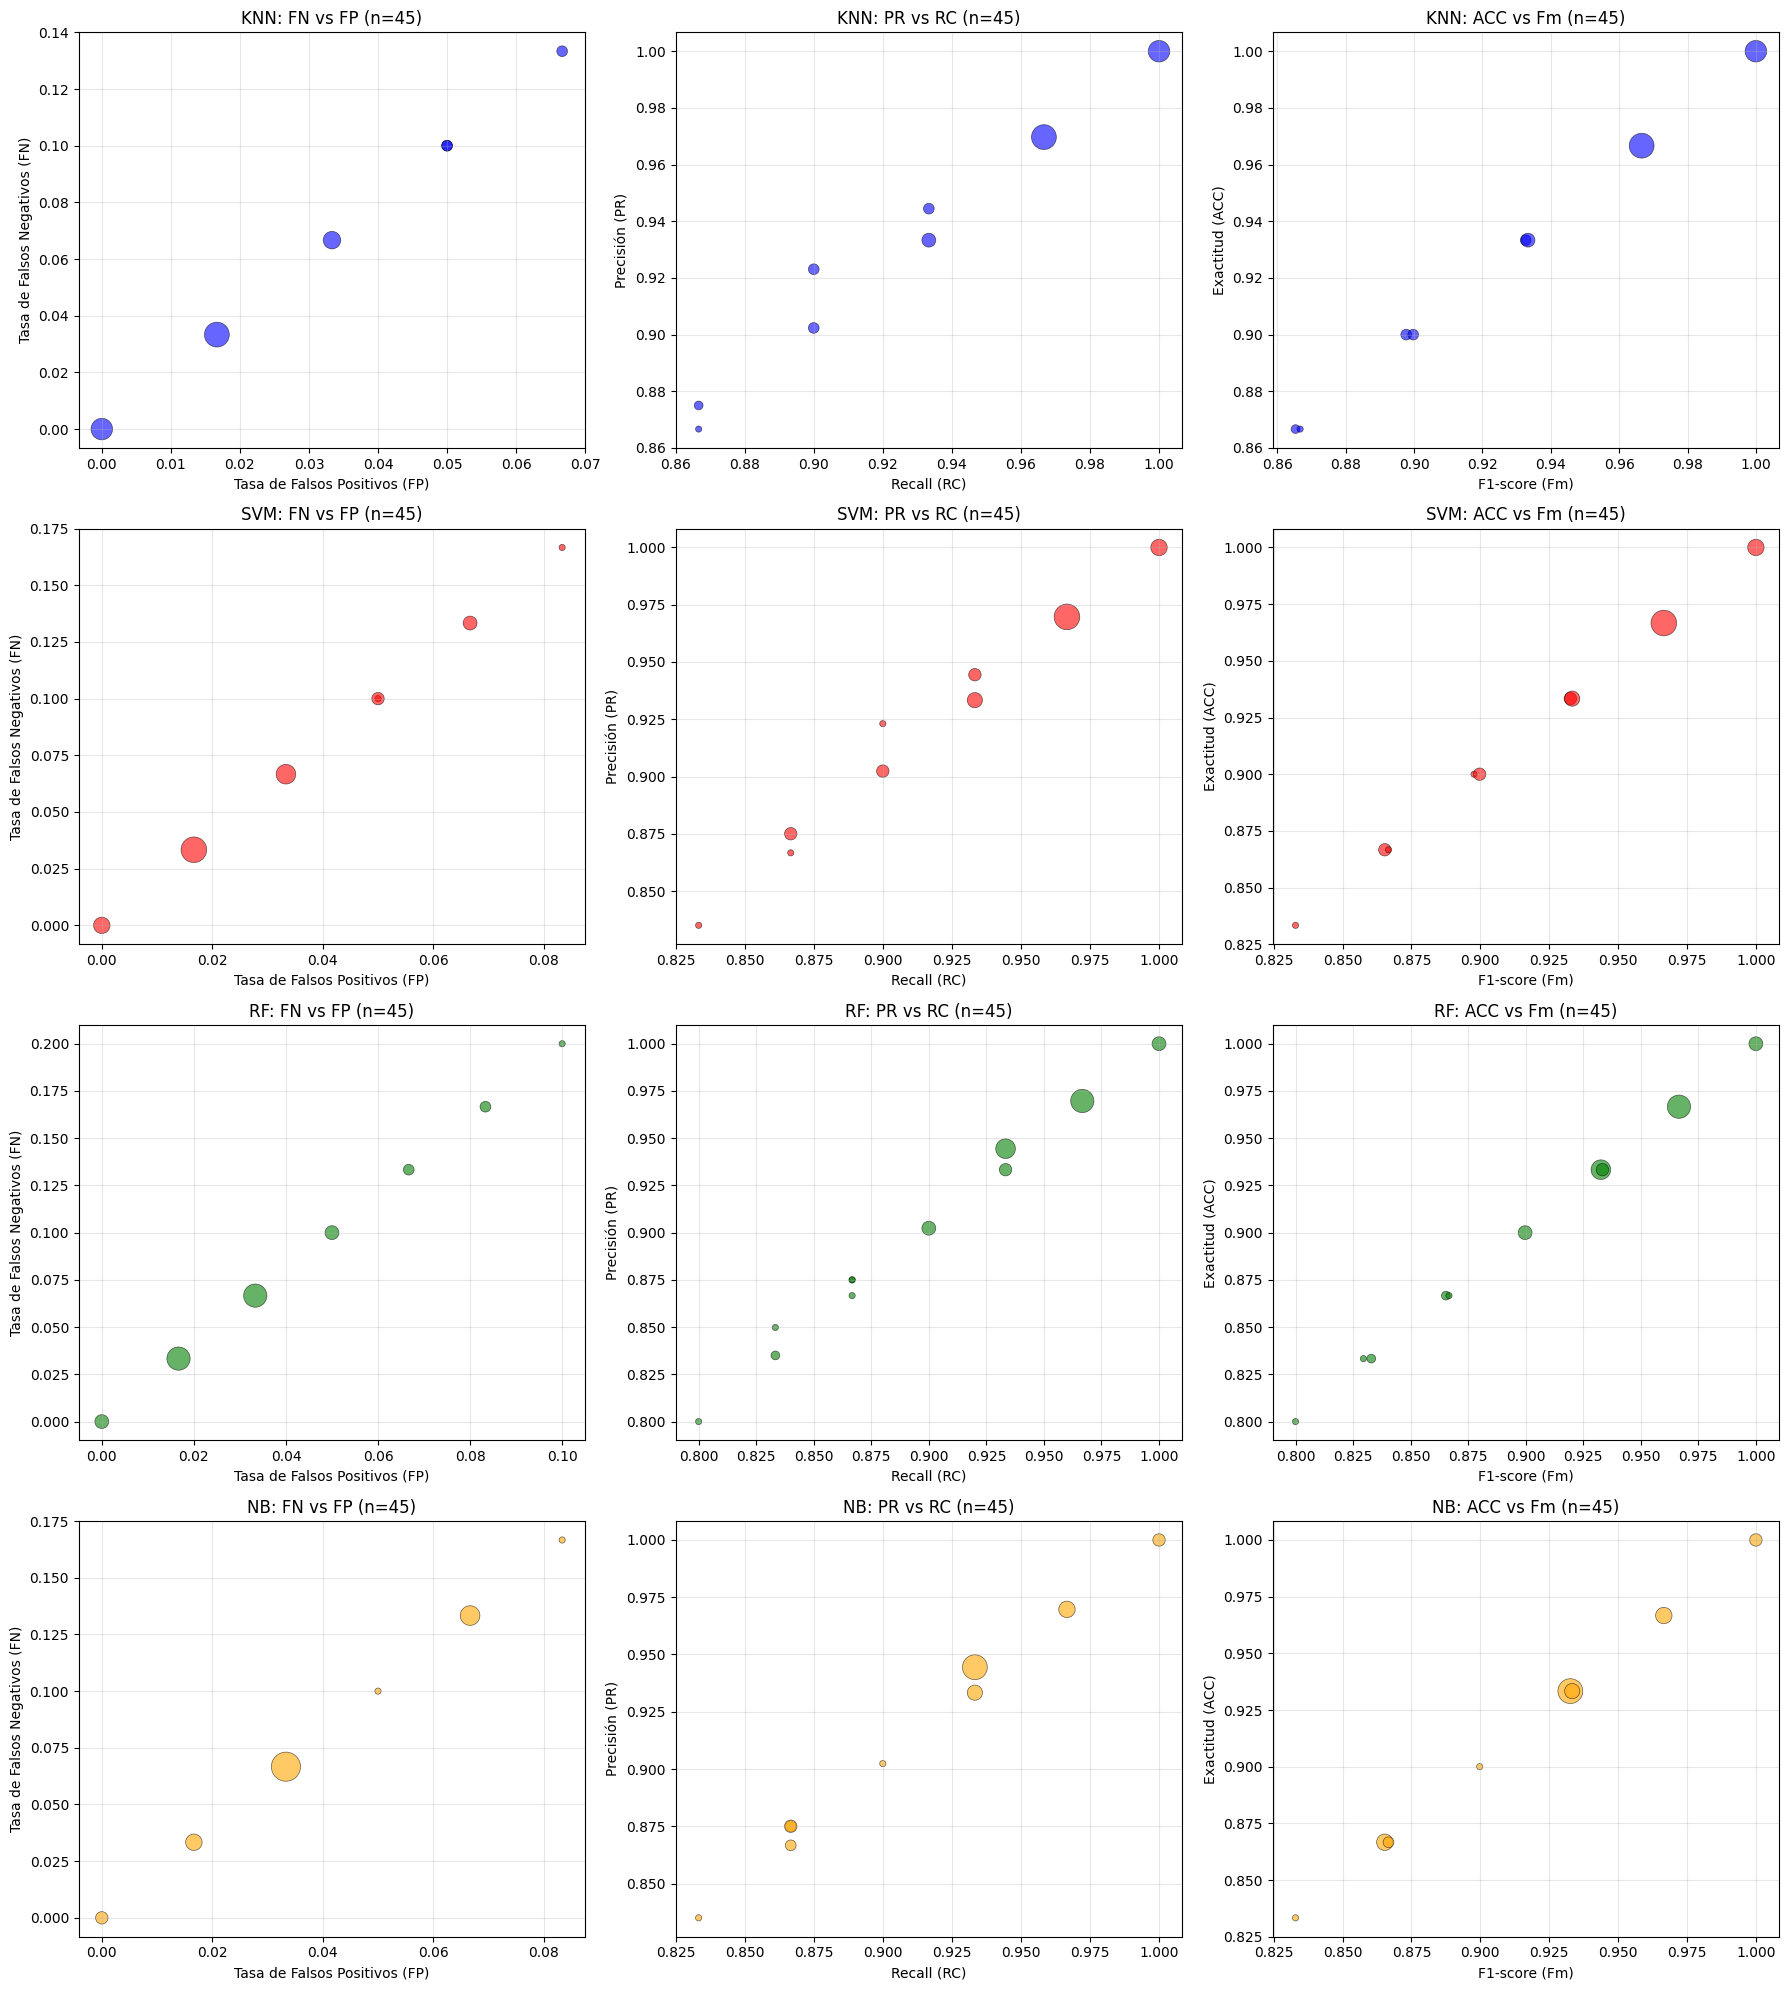

In [29]:
import matplotlib.pyplot as plt

def create_metric_plots():
    all_metrics = []
    
    for method in methods:
        for norm in norm_types:
            for pca in pca_variants:
                dataset_name = f"{norm}{pca}"
                
                for fold in range(1, 6):
                    file_pattern = f"cross_validation_evaluation/{method}_{dataset_name}_{fold}.csv"
                    if os.path.exists(file_pattern):
                        df = pd.read_csv(file_pattern)
                        metrics_dict = dict(zip(df['metric'], df['value']))
                        metrics_dict['method'] = method
                        metrics_dict['dataset'] = dataset_name
                        all_metrics.append(metrics_dict)
    
    df_all = pd.DataFrame(all_metrics)
    colors = {'KNN': 'blue', 'SVM': 'red', 'RF': 'green', 'NB': 'orange'}
    
    fig, axes = plt.subplots(4, 3, figsize=(18, 20))
    
    for idx, method in enumerate(methods):
        method_data = df_all[df_all['method'] == method]
        
        if not method_data.empty:
            # FN contra FP
            df_grouped = method_data.groupby(['Tasa de Falsos Positivos', 'Tasa de Falsos Negativos']).size().reset_index(name='count')
            axes[idx, 0].scatter(df_grouped['Tasa de Falsos Positivos'], 
                               df_grouped['Tasa de Falsos Negativos'],
                               s=df_grouped['count']*20, alpha=0.6, color=colors[method], edgecolors='black', linewidth=0.5)
            axes[idx, 0].set_xlabel('Tasa de Falsos Positivos (FP)')
            axes[idx, 0].set_ylabel('Tasa de Falsos Negativos (FN)')
            axes[idx, 0].set_title(f'{method}: FN vs FP (n={len(method_data)})')
            axes[idx, 0].grid(True, alpha=0.3)
            
            # PR contra RC
            df_grouped = method_data.groupby(['Recall', 'Precisión']).size().reset_index(name='count')
            axes[idx, 1].scatter(df_grouped['Recall'], 
                               df_grouped['Precisión'],
                               s=df_grouped['count']*20, alpha=0.6, color=colors[method], edgecolors='black', linewidth=0.5)
            axes[idx, 1].set_xlabel('Recall (RC)')
            axes[idx, 1].set_ylabel('Precisión (PR)')
            axes[idx, 1].set_title(f'{method}: PR vs RC (n={len(method_data)})')
            axes[idx, 1].grid(True, alpha=0.3)
            
            # ACC contra Fm
            df_grouped = method_data.groupby(['F1-score', 'Exactitud']).size().reset_index(name='count')
            axes[idx, 2].scatter(df_grouped['F1-score'], 
                               df_grouped['Exactitud'],
                               s=df_grouped['count']*20, alpha=0.6, color=colors[method], edgecolors='black', linewidth=0.5)
            axes[idx, 2].set_xlabel('F1-score (Fm)')
            axes[idx, 2].set_ylabel('Exactitud (ACC)')
            axes[idx, 2].set_title(f'{method}: ACC vs Fm (n={len(method_data)})')
            axes[idx, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('cross_validation_results/metric_comparisons.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return df_all

df_metrics = create_metric_plots()